<a href="https://colab.research.google.com/github/CharmStrange/CoLab_data/blob/main/ipynb-majoring/DS%EC%B5%9C%EC%A2%85_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Data Collection
## 유명 패스트푸드 기업들의 상품 영양 데이터셋

`Fast Food Nutrition` from https://www.kaggle.com/datasets/joebeachcapital/fast-food?select=FastFoodNutritionMenuV2.csv

## 01. 데이터셋 불러오기

In [1]:
import pandas as pd

df = pd.read_csv("/content/FastFoodNutritionMenuV2.csv")
df

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230,NaN,10,4.5,0,25,390,25,2,1,11,NaN
1144,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310,NaN,13,6,0,35,540,33,2,1,15,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120,NaN,4,1.5,0,10,230,17,1,1,5,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200,NaN,6,2.5,0,15,370,27,2,2,8,NaN


## 02. 데이터셋 파악하기

In [2]:
# 열 정보 추출
for column in df.columns:
    print(column)

Company
Item
Calories
Calories from
Fat
Total Fat
(g)
Saturated Fat
(g)
Trans Fat
(g)
Cholesterol
(mg)
Sodium 
(mg)
Carbs
(g)
Fiber
(g)
Sugars
(g)
Protein
(g)
Weight Watchers
Pnts


- **Company** : **기업 명**
- **Item** : **상품 명**
- **Calories** : **열량**
- **Calories from Fat** : **열량 중 지방**
- **Total Fat** : **총 지방**(g)
- **Saturated Fat** : **포화지방**(g)
- **Trans Fat** : **트랜스지방**(g)
- **Cholesterol** : **콜레스테롤**(mg)
- **Sodium** : **나트륨**(mg)
- **Carbs** : **탄수화물**(g)
- **Fiber** : **식이섬유**(g)
- **Sugars** : **당**(g)
- **Protein** : **단백질**(g)
- **Weight Watchers Pnts** : **영양 성분 평가 지표**

In [3]:
# 'Compnay' 열의 기업 명 추출
for company in df['Company'].unique():
    print(company)

# 맥도날드, 버거킹, 웬디스, KFC, 타코벨, 피자헛

McDonald’s
Burger King
Wendy’s
KFC
Taco Bell
Pizza Hut


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1148 non-null   object
 1   Item                  1148 non-null   object
 2   Calories              1147 non-null   object
 3   Calories from
Fat     642 non-null    object
 4   Total Fat
(g)         1091 non-null   object
 5   Saturated Fat
(g)     1091 non-null   object
 6   Trans Fat
(g)         1091 non-null   object
 7   Cholesterol
(mg)      1147 non-null   object
 8   Sodium 
(mg)          1147 non-null   object
 9   Carbs
(g)             1091 non-null   object
 10  Fiber
(g)             1091 non-null   object
 11  Sugars
(g)            1147 non-null   object
 12  Protein
(g)           1091 non-null   object
 13  Weight Watchers
Pnts  887 non-null    object
dtypes: object(14)
memory usage: 125.7+ KB


---

# Data Wrangling

## 필요한 정보만 골라내고, 데이터 정리하기

## 01. 결측치 확인하고 처리하기

In [5]:
# 기본 정보 체크
print(df.isna().sum())

print("\n결측치 비율")
for column in df.isna().sum():
    print(f"{column / len(df) * 100}%")


Company                    0
Item                       0
Calories                   1
Calories from\nFat       506
Total Fat\n(g)            57
Saturated Fat\n(g)        57
Trans Fat\n(g)            57
Cholesterol\n(mg)          1
Sodium \n(mg)              1
Carbs\n(g)                57
Fiber\n(g)                57
Sugars\n(g)                1
Protein\n(g)              57
Weight Watchers\nPnts    261
dtype: int64

결측치 비율
0.0%
0.0%
0.08710801393728224%
44.076655052264805%
4.965156794425087%
4.965156794425087%
4.965156794425087%
0.08710801393728224%
0.08710801393728224%
4.965156794425087%
4.965156794425087%
0.08710801393728224%
4.965156794425087%
22.73519163763066%


분석에 필요하지 않은 정보는 버린다.

`Calories from Fat`, `Weight Watchers Pnts`

In [6]:
# 다른 결측치를 확인
df = df.drop(['Calories from\nFat', 'Weight Watchers\nPnts'], axis=1)
missing_values = df[df.isnull().any(axis=1)]
missing_values

,Company,Item,Calories,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g)
64,McDonald’s,Salad Dressings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1018,Taco Bell,7-Up (16 fl oz),190,NaN,NaN,NaN,70,46,NaN,NaN,46,NaN
1019,Taco Bell,Brisk® Mango Iced Tea (16 fl oz),100,NaN,NaN,NaN,50,26,NaN,NaN,26,NaN
1020,Taco Bell,Brisk® Unsweetened No Lemon Iced Tea (16 fl oz),0,NaN,NaN,NaN,60,0,NaN,NaN,0,NaN
1021,Taco Bell,Diet Dr Pepper® (16 fl oz),0,NaN,NaN,NaN,95,0,NaN,NaN,0,NaN
1022,Taco Bell,Diet Mtn Dew® (16 fl oz),5,NaN,NaN,NaN,75,1,NaN,NaN,1,NaN
1023,Taco Bell,Diet Pepsi® (16 fl oz),0,NaN,NaN,NaN,75,0,NaN,NaN,0,NaN
1024,Taco Bell,Dr Pepper® (16 fl oz),190,NaN,NaN,NaN,60,52,NaN,NaN,51,NaN
1025,Taco Bell,G2 – Fruit Punch (16 fl oz),30,NaN,NaN,NaN,140,7,NaN,NaN,6,NaN
1026,Taco Bell,Mtn Dew® (16 fl oz),220,NaN,NaN,NaN,70,59,NaN,NaN,58,NaN


필요하지 않은 열을 제외한 나머지 열의 결측치를 보니 전부 탄산음료, 차 등의 음료고, 이런 음료는 보통 단백질, 탄수화물 등을 포함하지 않으니 0으로 처리를 해 주었다.

In [7]:
# 나머지 결측치 처리
new_df = df.fillna(0)
new_df.isna().sum()

Company               0
Item                  0
Calories              0
Total Fat\n(g)        0
Saturated Fat\n(g)    0
Trans Fat\n(g)        0
Cholesterol\n(mg)     0
Sodium \n(mg)         0
Carbs\n(g)            0
Fiber\n(g)            0
Sugars\n(g)           0
Protein\n(g)          0
dtype: int64

## 02. 데이터 정리하기

In [8]:
# 필요한 열에 대한 정리
new_df[['Company', 'Item', 'Saturated Fat\n(g)', 'Cholesterol\n(mg)', 'Sodium \n(mg)', 'Sugars\n(g)']]

# 데이터 형태 확인
print(new_df['Saturated Fat\n(g)'].dtype)
print(new_df['Cholesterol\n(mg)'].dtype)
print(new_df['Sodium \n(mg)'].dtype)
print(new_df['Sugars\n(g)'].dtype)

# 데이터 형태 변환
new_df['Saturated Fat\n(g)'] = pd.to_numeric(new_df['Saturated Fat\n(g)'].str.replace(r'[^0-9.]', ''), errors='coerce').fillna(0).astype(float)
new_df['Cholesterol\n(mg)'] = pd.to_numeric(new_df['Cholesterol\n(mg)'].replace('\xa0', ''), errors='coerce').fillna(0).astype(float)
new_df['Sodium \n(mg)'] = pd.to_numeric(new_df['Sodium \n(mg)'].replace('\xa0', ''), errors='coerce').fillna(0).astype(float)
new_df['Sugars\n(g)'] = pd.to_numeric(new_df['Sugars\n(g)'].replace('\xa0', ''), errors='coerce').fillna(0).astype(float)

print(new_df['Saturated Fat\n(g)'].dtype)
print(new_df['Cholesterol\n(mg)'].dtype)
print(new_df['Sodium \n(mg)'].dtype)
print(new_df['Sugars\n(g)'].dtype)

object
object
object
object
float64
float64
float64
float64


<ipython-input-8-655d951ea7e3>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['Saturated Fat\n(g)'] = pd.to_numeric(new_df['Saturated Fat\n(g)'].str.replace(r'[^0-9.]', ''), errors='coerce').fillna(0).astype(float)


---

#Data Analysis

<ipython-input-13-74e8a892e9da>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()
<ipython-input-13-74e8a892e9da>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(new_df.corr())
<ipython-input-13-74e8a892e9da>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', linewidths=.5, mask=mask)


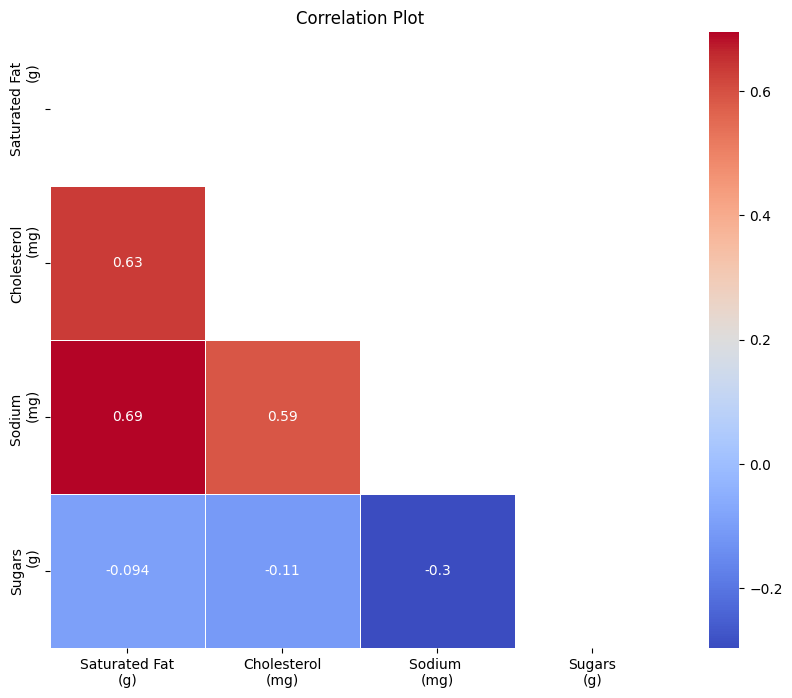

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

new_df.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(new_df.corr())
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', linewidths=.5, mask=mask)
plt.title('Correlation Plot')
plt.show()

패스트 푸드 기업별로 당, 나트륨, 포화지방, 콜레스테롤을 표시 / 패스트 푸드 유형별로 표시?